# Prediction using Unsupervised ML

## BY AGBOOLA QUAM

**This notebook will walk through some of the basics of K-Means Clustering.**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [44]:
# Load the iris dataset
iris=pd.read_csv('iris.csv')
iris.head(8)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa

In [3]:
#1 Checking the dimension of the iris dataframe
iris.shape

(150, 6)

In [4]:
#2 Checking the data structure and also if there is missing value in any row in the data frame
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
#missing data
total = iris.isnull().sum().sort_values(ascending=False)
percent = (iris.isnull().sum()/iris.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
Species            0      0.0
PetalWidthCm       0      0.0
PetalLengthCm      0      0.0
SepalWidthCm       0      0.0
SepalLengthCm      0      0.0
Id                 0      0.0

In [6]:
iris.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [7]:
#Checking unique values in each of our variable in the dataset
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [8]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### DESCRIPTIVE STATISTICS

In [9]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [10]:
#Checking number of passengers that survived and didn't survive in the titanic dataset
pd.DataFrame(iris.Species.value_counts())

Species
Iris-setosa           50
Iris-virginica        50
Iris-versicolor       50

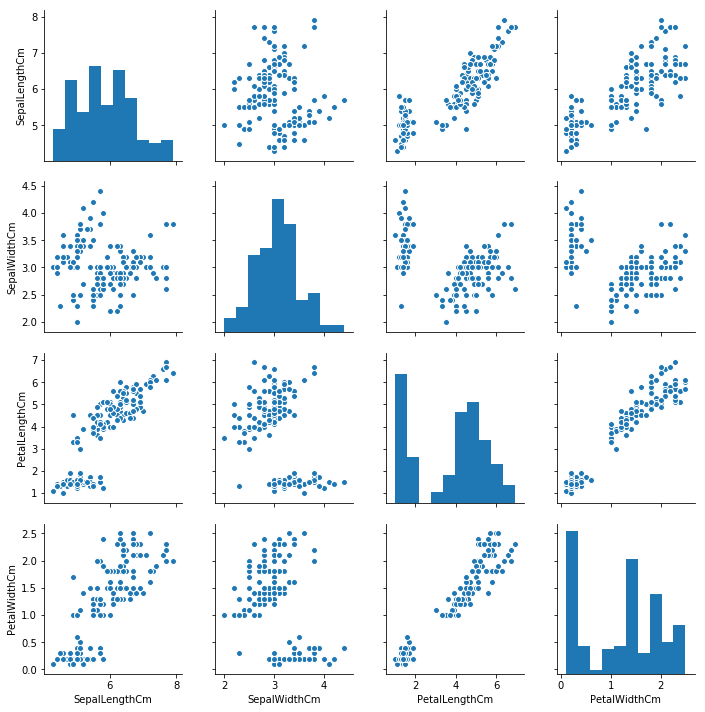

In [11]:
sns.pairplot(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]);

## How do you find the optimum number of clusters for K Means? How does one determine the value of K?

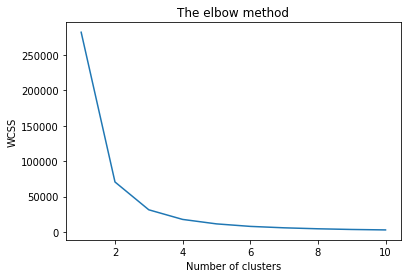

In [12]:
# Finding the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

**In the plot above the elbow is k=3 indicating the optimal k for this dataset is 3.**
- As expected, the plot looks like an arm with a clear elbow at k=3

In [64]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")

In [65]:
iris.iloc[:,[1]].head()

SepalLengthCm
0            5.1
1            4.9
2            4.7
3            4.6
4            5.0

In [67]:
iris_ind = iris.iloc[:,:4]

In [68]:
iris_ind.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
0   1            5.1           3.5            1.4
1   2            4.9           3.0            1.4
2   3            4.7           3.2            1.3
3   4            4.6           3.1            1.5
4   5            5.0           3.6            1.4

In [69]:
#TARGET VARIABLE
iris_targ=iris["Species"]
iris_targ.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [70]:
type(iris_targ)

pandas.core.series.Series

In [71]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [93]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [94]:
y_kmeans = kmeans.fit_predict(x)

In [95]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
k=kmeans.cluster_centers_
k

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [97]:
#Confusion matrix
labels=kmeans.labels_

In [98]:
centroids=kmeans.cluster_centers_

In [102]:
pd.crosstab(iris_targ,labels)

col_0             0   1   2
Species                    
Iris-setosa      50   0   0
Iris-versicolor   0   0  50
Iris-virginica    0  50   0

### Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

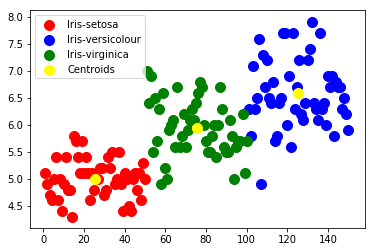

In [103]:
# Visualising the clusters - On the first two columns
plt.scatter(iris_ind[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k[:, 0], k[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();